In [21]:
import cv2
from matplotlib import pyplot
import numpy

# Ustawienie rozmarów wyświetlanych obrazów
pyplot.rcParams["figure.figsize"] = (18, 10)

In [22]:
#
# Wczytanie obrazów źródłowych
#
# źródło grafiki colors.jpg: https://unsplash.com/photos/gT5kuls6Y6Q
# źródło grafiki gacław-na-kuchni.jpg: własne

# image_from_file = cv2.imread('images/colors.jpg')
# image_from_file = cv2.imread('images/gacław-na-kuchni.jpg')
image_from_file = cv2.imread('images/piesio.jpeg')
image_gray = cv2.cvtColor(image_from_file, cv2.COLOR_BGR2GRAY)
image_color = cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB)
print('Rozmiar obrazka: ', image_from_file.shape)

Rozmiar obrazka:  (1170, 672, 3)


# Zadanie 1

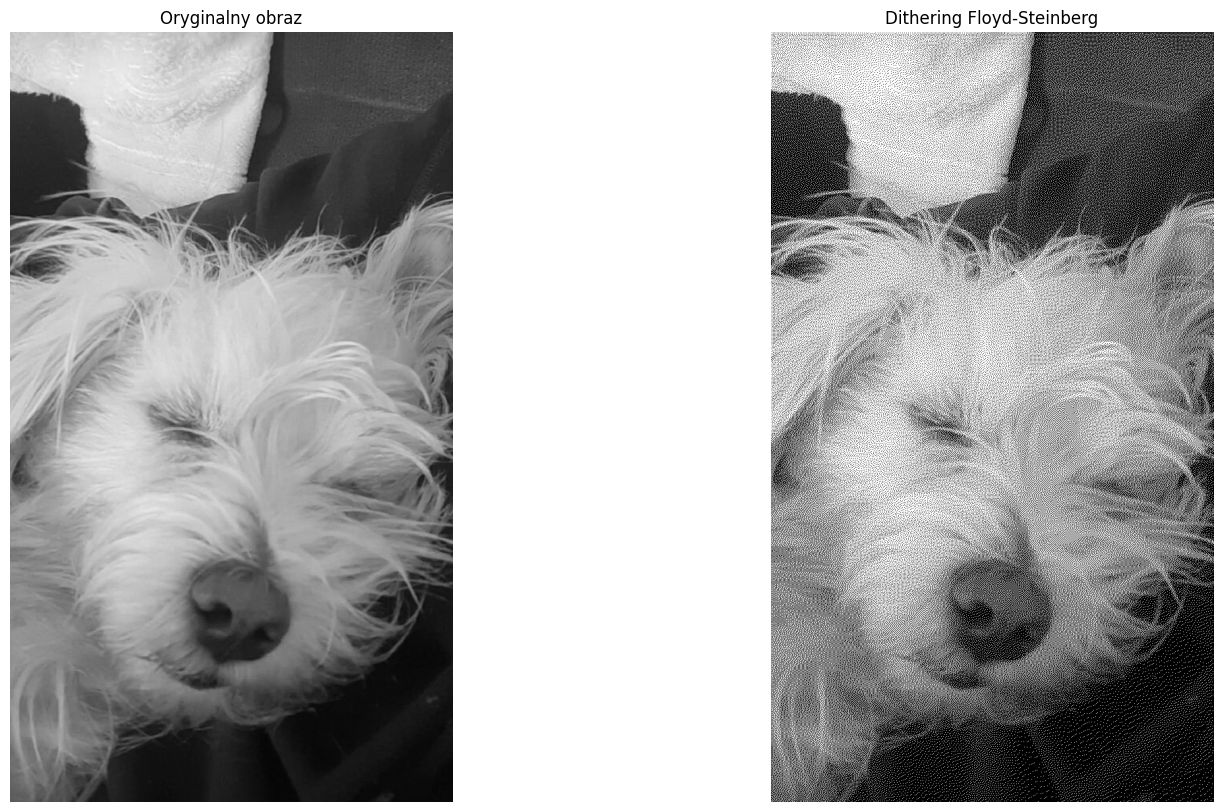

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

output = image_gray.astype(np.float32)

def find_closest_palette_color(value):
    return round(value / 255) * 255

height, width = output.shape
for y in range(height):
    for x in range(width):
        old_pixel = output[y, x]
        new_pixel = find_closest_palette_color(old_pixel)
        output[y, x] = new_pixel
        quant_error = old_pixel - new_pixel
        
        if x + 1 < width:
            output[y, x + 1] += quant_error * 7 / 16
        if y + 1 < height and x - 1 >= 0:
            output[y + 1, x - 1] += quant_error * 3 / 16
        if y + 1 < height:
            output[y + 1, x] += quant_error * 5 / 16
        if y + 1 < height and x + 1 < width:
            output[y + 1, x + 1] += quant_error * 1 / 16

output = np.clip(output, 0, 255).astype(np.uint8)

plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray', vmin=0, vmax=255)
plt.title('Oryginalny obraz')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray', vmin=0, vmax=255)
plt.title('Dithering Floyd-Steinberg')
plt.axis('off')

plt.show()

Text(0, 0.5, 'Liczba pikseli obrazu []')

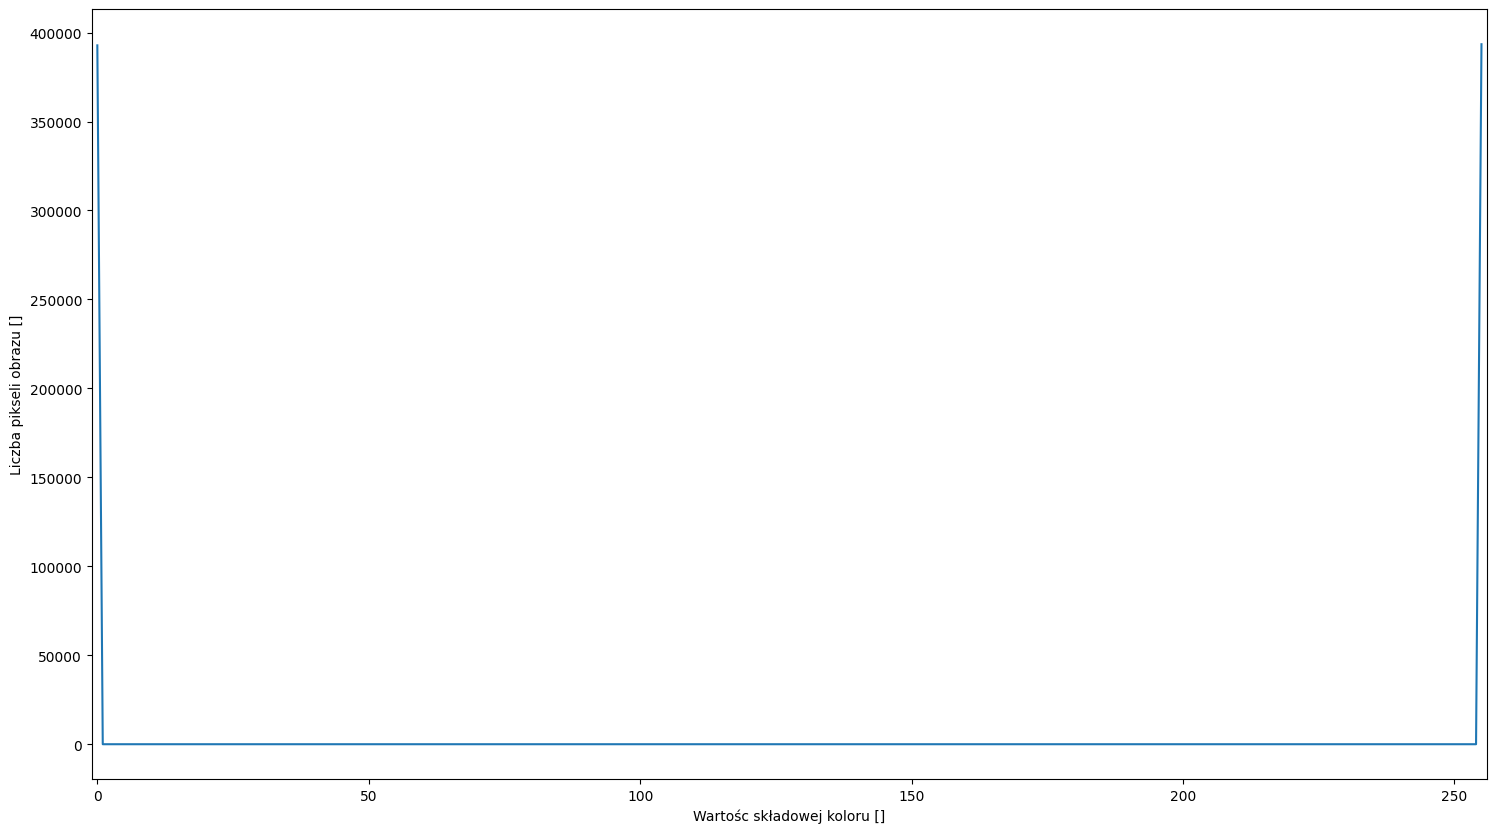

In [24]:
#
# Histogram
#
histr = cv2.calcHist([output], [0], None, [256], [0, 256])
pyplot.plot(histr)
pyplot.xlim([-1, 256])
pyplot.xlabel('Wartośc składowej koloru []')
pyplot.ylabel('Liczba pikseli obrazu []')

# Zadanie 2

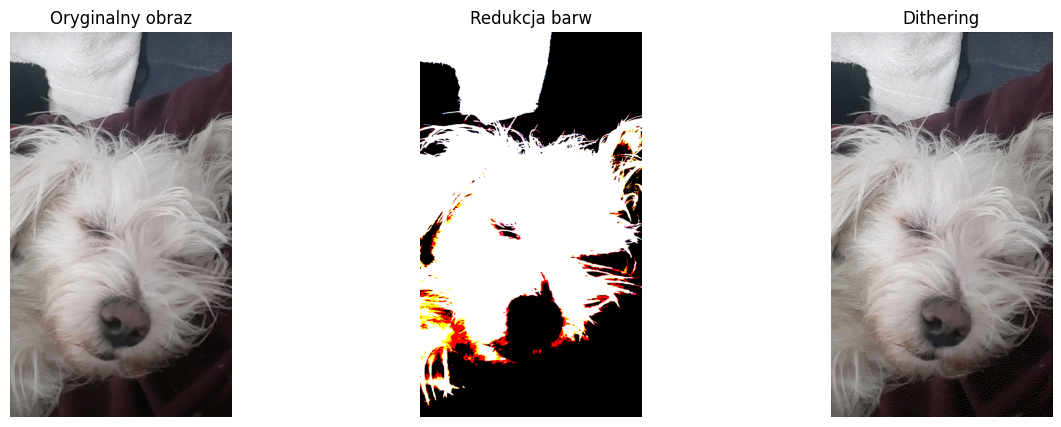

In [25]:
reduced_image = numpy.copy(image_color).astype(numpy.float32)

for y in range(reduced_image.shape[0]):
    for x in range(reduced_image.shape[1]):
        for c in range(3):
            reduced_image[y, x, c] = find_closest_palette_color(reduced_image[y, x, c])

reduced_image = numpy.clip(reduced_image, 0, 255).astype(numpy.uint8)
output = numpy.copy(image_color).astype(numpy.float32)

k = 2

def find_closest_palette_color(value):
    level = round((k - 1) * value / 255)
    return int(255 * level / (k - 1))

for y in range(output.shape[0]):
    for x in range(output.shape[1]):
        old_pixel = output[y, x].copy()
        new_pixel = numpy.zeros(3)
        quant_error = numpy.zeros(3)

        for c in range(3):
            new_pixel[c] = find_closest_palette_color(old_pixel[c])
            quant_error[c] = old_pixel[c] - new_pixel[c]
            output[y, x, c] = new_pixel[c]

        if x + 1 < output.shape[1]:
            for c in range(3):
                output[y, x + 1, c] += quant_error[c] * 7 / 16
        if y + 1 < output.shape[0] and x > 0:
            for c in range(3):
                output[y + 1, x - 1, c] += quant_error[c] * 3 / 16
        if y + 1 < output.shape[0]:
            for c in range(3):
                output[y + 1, x, c] += quant_error[c] * 5 / 16
        if y + 1 < output.shape[0] and x + 1 < output.shape[1]:
            for c in range(3):
                output[y + 1, x + 1, c] += quant_error[c] * 1 / 16

output = numpy.clip(output, 0, 255).astype(numpy.uint8)

pyplot.figure(figsize=(15, 5))

pyplot.subplot(1, 3, 1)
pyplot.title('Oryginalny obraz')
pyplot.imshow(image_color)
pyplot.axis('off')

pyplot.subplot(1, 3, 2)
pyplot.title('Redukcja barw'.format(k))
pyplot.imshow(reduced_image)
pyplot.axis('off')

pyplot.subplot(1, 3, 3)
pyplot.title('Dithering'.format(k))
pyplot.imshow(output)
pyplot.axis('off')

pyplot.show()


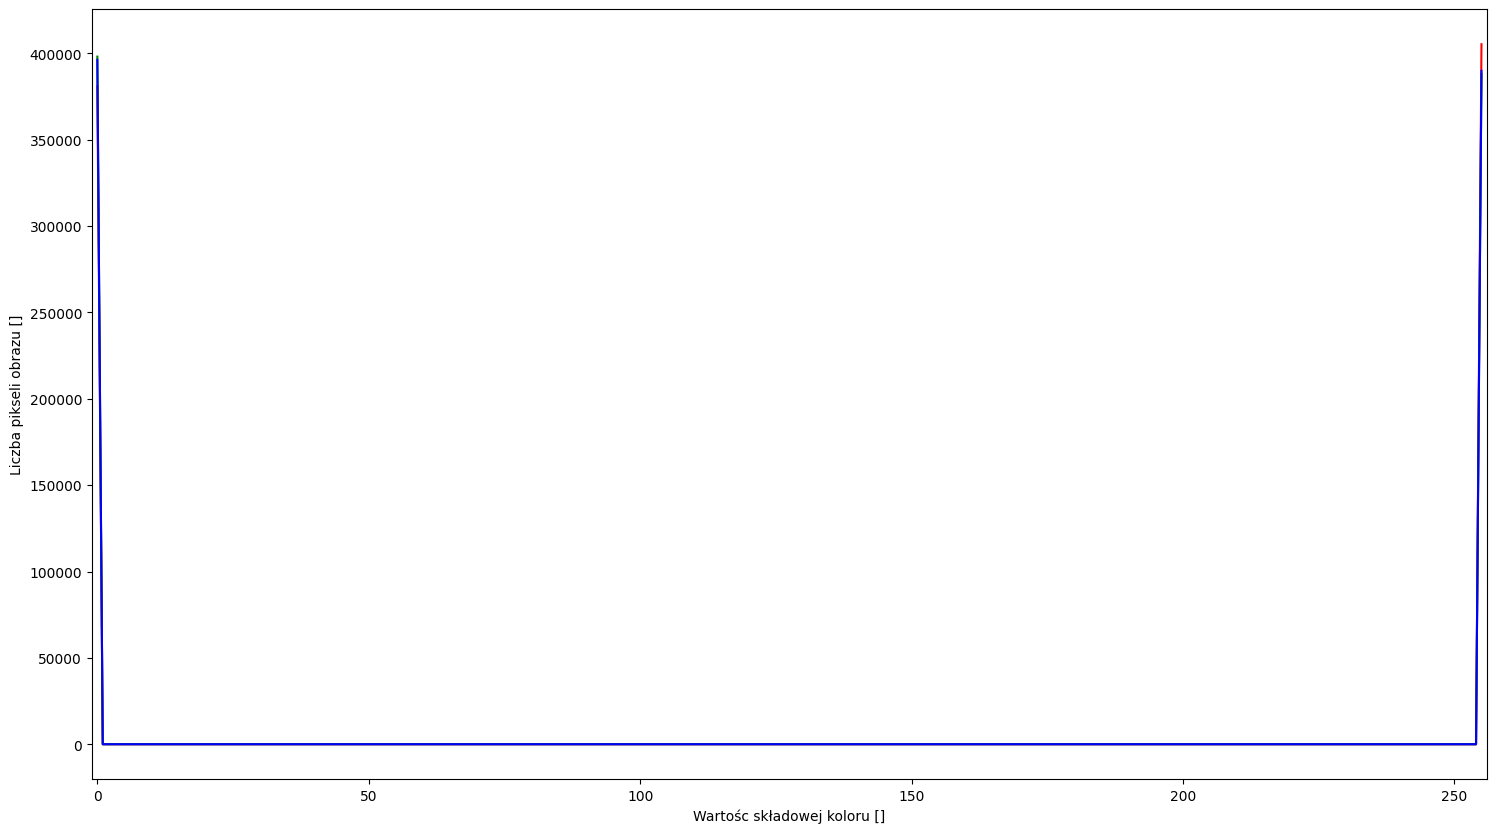

In [26]:
#
# Histogram
#
color = ('r', 'g', 'b')

for i, col in enumerate(color):
    histr = cv2.calcHist([output], [i], None, [256], [0, 256])
    pyplot.plot(histr, color=col)
    pyplot.xlim([-1, 256])
    pyplot.xlabel('Wartośc składowej koloru []')
    pyplot.ylabel('Liczba pikseli obrazu []')

# Zadanie 3

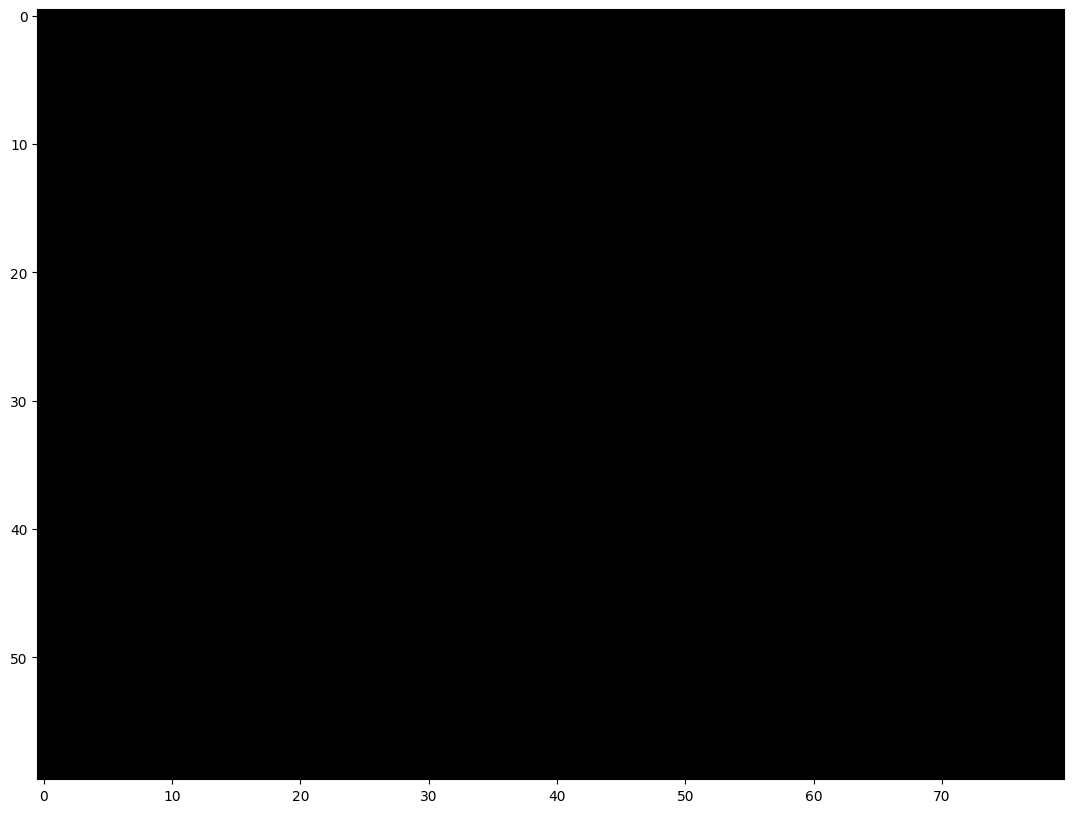

In [27]:
#
# Przygotowanie płótna
#
width = 80
height = 60
image = numpy.zeros((height, width, 3), dtype=numpy.uint8)


#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, x2, y2):
    pass  # TODO: implement


#
# Funkcja rysująca trójkąt
#
def draw_triangle(image, a, b, c):
    pass  # TODO: implement


#
# Rysowanie
#
pass  # TODO: implement

#
# Wyświetlenie
#
pyplot.imshow(image)

# Zadanie 4

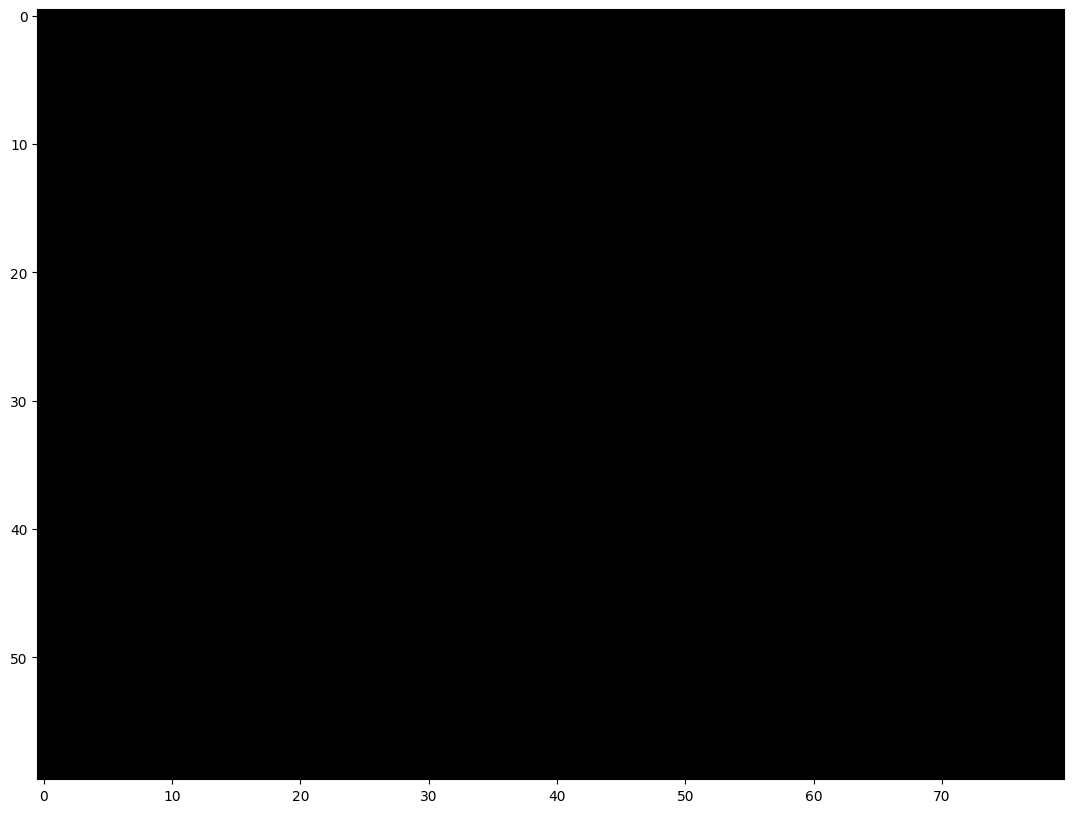

In [28]:
#
# Przygotowanie płótna
#
width = 80
height = 60
image = numpy.zeros((height, width, 3), dtype=numpy.uint8)


#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, x2, y2):
    pass  # TODO: implement


#
# Funkcja rysująca trójkąt
#
def draw_triangle(image, a, b, c):
    pass  # TODO: implement


#
# Rysowanie
#
pass  # TODO: implement

#
# Wyświetlenie
#
pyplot.imshow(image)

# Zadanie 5

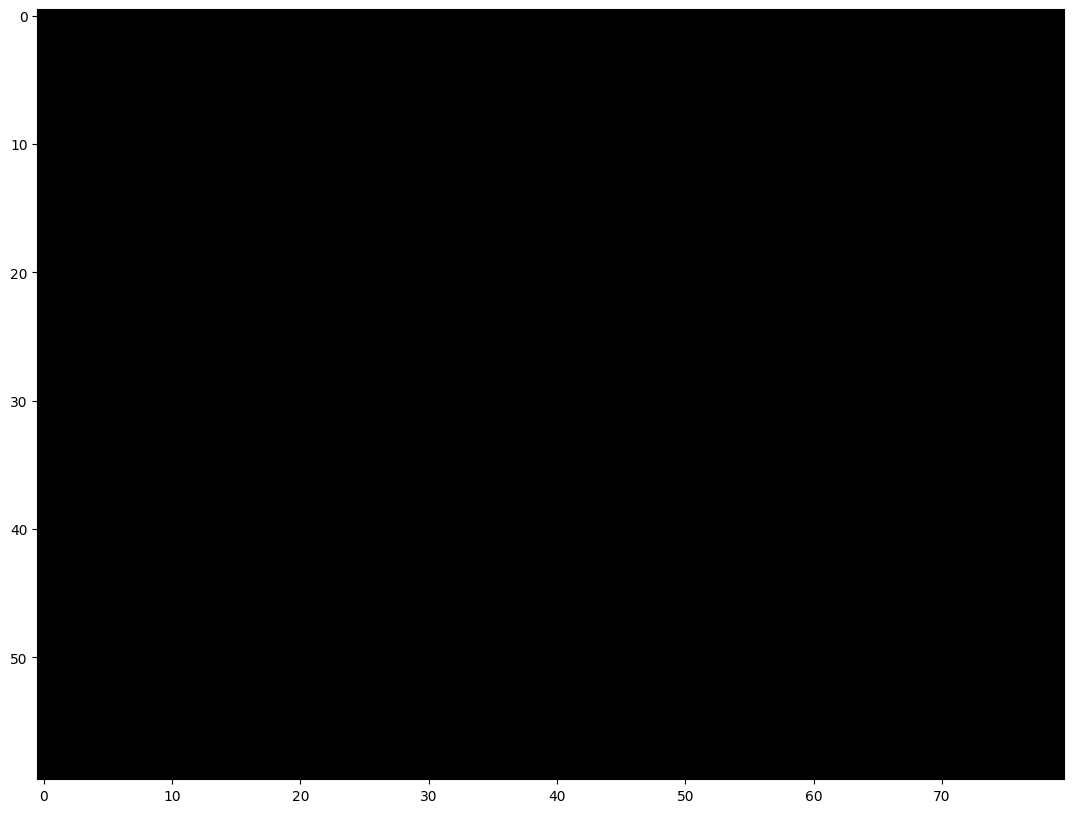

In [29]:
#
# Przygotowanie płótna
#
width = 80
height = 60
image = numpy.zeros((height, width, 3), dtype=numpy.uint8)


#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, x2, y2):
    pass  # TODO: implement


#
# Funkcja rysująca trójkąt
#
def draw_triangle(image, a, b, c):
    pass  # TODO: implement


#
# Rysowanie
#
pass  # TODO: implement

#
# Wyświetlenie
#
pyplot.imshow(image)